In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [224, 224]

train_path = './Train'
valid_path = './Test'

In [3]:
folders = glob('./Train/*')

In [4]:
folders

['./Train\\0',
 './Train\\1',
 './Train\\10',
 './Train\\11',
 './Train\\12',
 './Train\\13',
 './Train\\14',
 './Train\\15',
 './Train\\16',
 './Train\\17',
 './Train\\18',
 './Train\\19',
 './Train\\2',
 './Train\\3',
 './Train\\4',
 './Train\\5',
 './Train\\6',
 './Train\\7',
 './Train\\8',
 './Train\\9']

In [5]:
Classifier=Sequential()

Classifier.add(Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 20, activation = 'softmax'))
#use 7 for notes

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)

In [8]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('./Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18000 images belonging to 20 classes.


In [9]:
test_set = test_datagen.flow_from_directory('./Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 6000 images belonging to 20 classes.


In [10]:
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=200,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

c:\users\impan\appdata\local\programs\python\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/200


c:\users\impan\appdata\local\programs\python\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


563/563 [==============================] - 1353s 2s/step - loss: 0.2056 - acc: 0.9388 - val_loss: 0.0803 - val_acc: 0.9743
Epoch 2/200
563/563 [==============================] - 1734s 3s/step - loss: 0.0296 - acc: 0.9911 - val_loss: 0.0438 - val_acc: 0.9893
Epoch 3/200
563/563 [==============================] - 729s 1s/step - loss: 0.0230 - acc: 0.9938 - val_loss: 0.0185 - val_acc: 0.9948
Epoch 4/200
563/563 [==============================] - 654s 1s/step - loss: 0.0188 - acc: 0.9946 - val_loss: 0.0256 - val_acc: 0.9915
Epoch 5/200
563/563 [==============================] - 676s 1s/step - loss: 0.0169 - acc: 0.9958 - val_loss: 0.0252 - val_acc: 0.9930
Epoch 6/200
563/563 [==============================] - 1008s 2s/step - loss: 0.0049 - acc: 0.9983 - val_loss: 0.0077 - val_acc: 0.9972
Epoch 7/200
563/563 [==============================] - 1586s 3s/step - loss: 0.0128 - acc: 0.9967 - val_loss: 0.0181 - val_acc: 0.9962
Epoch 8/200
563/563 [==============================] - 1590s 3s/step -

Epoch 37/200
563/563 [==============================] - 557s 989ms/step - loss: 3.2053e-04 - acc: 0.9999 - val_loss: 0.0445 - val_acc: 0.9908
Epoch 38/200
563/563 [==============================] - 554s 985ms/step - loss: 0.0016 - acc: 0.9994 - val_loss: 0.0505 - val_acc: 0.9913
Epoch 39/200
563/563 [==============================] - 555s 986ms/step - loss: 0.0017 - acc: 0.9995 - val_loss: 0.0587 - val_acc: 0.9923
Epoch 40/200
563/563 [==============================] - 555s 986ms/step - loss: 0.0028 - acc: 0.9990 - val_loss: 0.0259 - val_acc: 0.9945
Epoch 41/200
563/563 [==============================] - 536s 951ms/step - loss: 0.0039 - acc: 0.9994 - val_loss: 0.0304 - val_acc: 0.9937
Epoch 42/200
563/563 [==============================] - 537s 955ms/step - loss: 0.0035 - acc: 0.9994 - val_loss: 0.0231 - val_acc: 0.9953
Epoch 43/200
563/563 [==============================] - 539s 958ms/step - loss: 0.0050 - acc: 0.9992 - val_loss: 0.0073 - val_acc: 0.9982
Epoch 44/200
563/563 [========

563/563 [==============================] - 533s 947ms/step - loss: 7.3778e-04 - acc: 0.9999 - val_loss: 0.0206 - val_acc: 0.9970
Epoch 108/200
563/563 [==============================] - 550s 977ms/step - loss: 3.6964e-04 - acc: 0.9999 - val_loss: 0.0100 - val_acc: 0.9975
Epoch 109/200
563/563 [==============================] - 532s 945ms/step - loss: 2.5399e-04 - acc: 0.9999 - val_loss: 0.0134 - val_acc: 0.9972
Epoch 110/200
563/563 [==============================] - 536s 952ms/step - loss: 1.8902e-05 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 0.9993
Epoch 111/200
563/563 [==============================] - 532s 946ms/step - loss: 3.9593e-07 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 0.9993
Epoch 112/200
563/563 [==============================] - 535s 951ms/step - loss: 0.0014 - acc: 0.9999 - val_loss: 0.0355 - val_acc: 0.9967
Epoch 113/200
563/563 [==============================] - 535s 949ms/step - loss: 6.9684e-04 - acc: 0.9998 - val_loss: 0.0338 - val_acc: 0.9977
Epoch 114/200
563

563/563 [==============================] - 543s 965ms/step - loss: 0.0013 - acc: 0.9999 - val_loss: 0.0672 - val_acc: 0.9962
Epoch 178/200
563/563 [==============================] - 544s 966ms/step - loss: 0.0022 - acc: 0.9998 - val_loss: 0.0863 - val_acc: 0.9950
Epoch 179/200
563/563 [==============================] - 542s 963ms/step - loss: 0.0020 - acc: 0.9998 - val_loss: 0.0530 - val_acc: 0.9980
Epoch 180/200
563/563 [==============================] - 541s 961ms/step - loss: 5.4745e-04 - acc: 0.9999 - val_loss: 0.0279 - val_acc: 0.9980
Epoch 181/200
563/563 [==============================] - 541s 962ms/step - loss: 0.0042 - acc: 0.9997 - val_loss: 0.0875 - val_acc: 0.9962
Epoch 182/200
563/563 [==============================] - 543s 965ms/step - loss: 6.4884e-07 - acc: 1.0000 - val_loss: 0.0881 - val_acc: 0.9965
Epoch 183/200
563/563 [==============================] - 558s 991ms/step - loss: 0.0020 - acc: 0.9998 - val_loss: 0.0477 - val_acc: 0.9983
Epoch 184/200
563/563 [==========

In [11]:
r.history

{'loss': [0.20575234368050263,
  0.029593552397266548,
  0.023056833450669525,
  0.01886395758941459,
  0.016385470542333982,
  0.004924588948185172,
  0.012834822442997386,
  0.009984599174174744,
  0.01611287444658449,
  0.006451844112349843,
  0.0054195394271376015,
  0.003823911119201354,
  0.005056946794563218,
  0.0043050763285507904,
  0.005391935046624061,
  0.005680844384858271,
  0.0021679854231684255,
  0.006139272920080644,
  0.0018153488359961244,
  0.0036637191811213464,
  0.0013268463709151684,
  0.0016196550534364443,
  0.008435628069952888,
  0.005403782840337818,
  0.0027142407010353198,
  0.0009548927437392223,
  0.00010212121557295323,
  0.012755609644914184,
  0.002930176194124942,
  0.0017228819723607662,
  0.0015731116413053132,
  0.0019264488133872368,
  0.0002566702592967367,
  0.0003646324032635684,
  0.00407803025009026,
  0.009462080304471057,
  0.00032081528332077153,
  0.0016121385575776092,
  0.0017234764857393405,
  0.002839766298532906,
  0.003896596762

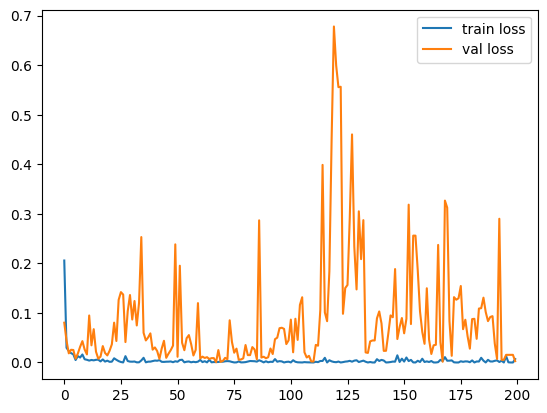

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


In [13]:
from tensorflow.keras.models import load_model

Classifier.save('gesture_model_Classifier.h5')

In [14]:
y_pred = Classifier.predict(test_set)

In [15]:
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [17]:
y_pred

array([10,  8,  6, ...,  5, 14,  1], dtype=int64)

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:
model=load_model('gesture_model_Classifier.h5')

AttributeError: 'str' object has no attribute 'decode'